In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
from src.data.news.coverage_filter import filter_protests
from src.data.protests.sources.acled import load_acled

acled = load_acled()
from src.data.news.sources.mediacloud import newspapers_by_region

acled = acled[acled["admin1"].isin(newspapers_by_region.keys())]
climate_actors = [
    "FFF: Fridays for Future; Students (Germany)",
    # "ALG: Uprising of the Last Generation (Germany)",
    # "Extinction Rebellion",
    # "Ende Gelaende",
]
acled = acled[acled["assoc_actor_1"].isin(climate_actors)]
acled = acled[
    (acled["event_date"] >= "2020-01-01") & (acled["event_date"] < "2022-11-30")
]
acled = filter_protests(acled, source="mediacloud")

In [3]:
from src.data.news.coverage_filter import filter_protests
from src.data.protests.random import get_random_events

random_events = get_random_events(150)
random_events = filter_protests(random_events, source="mediacloud")

In [4]:
from datetime import date

from src.models.synthetic_region import (
    evaluate_multiple_protests,
    predict_with_boosting,
    predict_with_lasso,
)


def evaluate(
    data=acled, method=predict_with_lasso, training_window_n_days=[7 * 4, 7 * 16, None]
):
    eval = []
    for training_window_n_days_ in training_window_n_days:
        metrics, dfs, agg_df = evaluate_multiple_protests(
            "klima*",
            data,
            source="mediacloud",
            data_kwargs=dict(
                n_days_train=training_window_n_days_,
                n_days_predict=7 * 2,
                n_days_protest_free_pre=0,
                n_days_protest_free_post=0,
                min_control_regions=1,
            ),
            method_kwargs=dict(
                method=method,
            ),
        )
        eval.append(
            {
                "training_window_n_days": training_window_n_days_,
                "method": method.__name__,
                "metrics": metrics,
                "dfs": dfs,
                "agg_df": agg_df,
            }
        )
    return eval

In [ ]:
eval = evaluate(acled)

In [8]:
import matplotlib.pyplot as plt
import numpy as np


def plot(eval):
    fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)
    for i, e in enumerate(eval):
        mse, change, size, region = zip(
            *[
                (
                    r["eval_mse"],
                    r["change"],
                    r["protest"]["size"] if "size" in r["protest"] else 1,
                    r["protest_region"],
                )
                for r in e["metrics"]
            ]
        )
        colors = {r: f"C{i}" for i, r in enumerate(set(region))}
        ax[i].scatter(
            mse, change, s=np.sqrt(size), c=[colors[r] for r in region], alpha=0.5
        )
        ax[i].set_xscale("log")
        ax[i].axhline(1, color="r")
        # ax[i].set_ylim(-0.3, 0.3)
    plt.show()

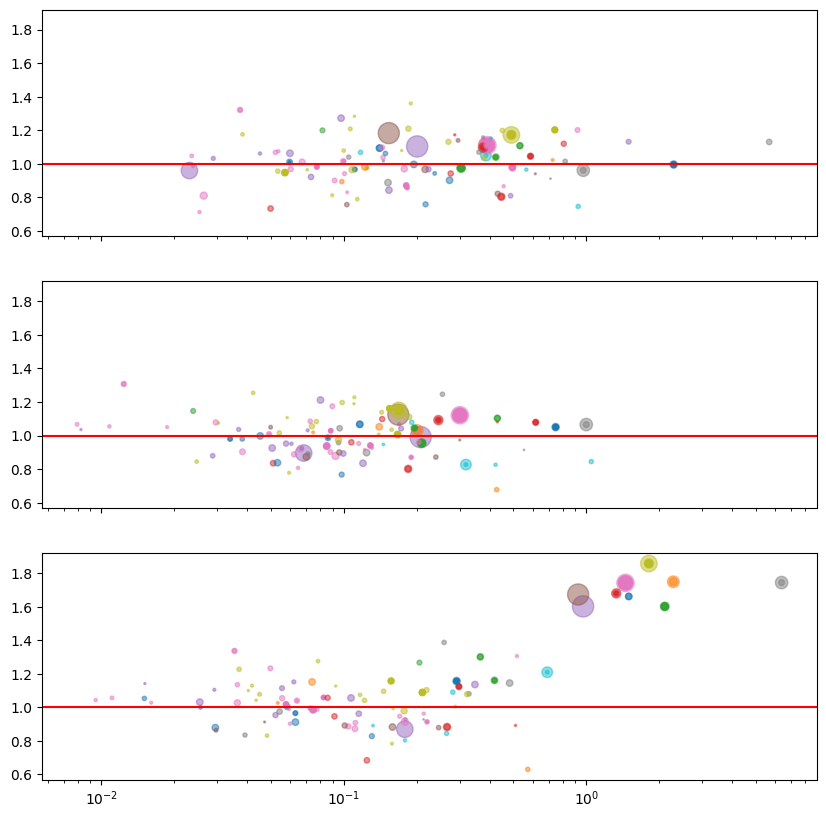

In [ ]:
plot(eval)

  0%|          | 0/291 [00:00<?, ?it/s]

  0%|          | 0/291 [00:00<?, ?it/s]

  0%|          | 0/291 [00:00<?, ?it/s]

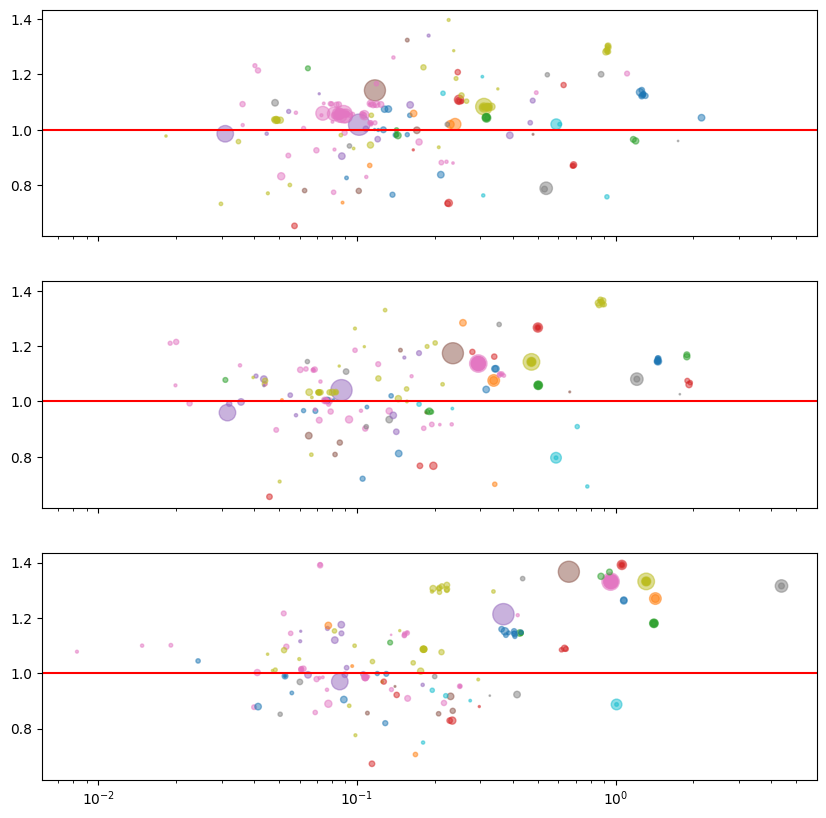

In [ ]:
eval = evaluate(data=acled, method=predict_with_boosting)
plot(eval)

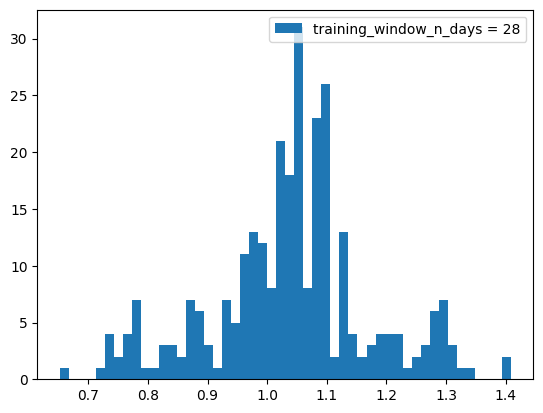

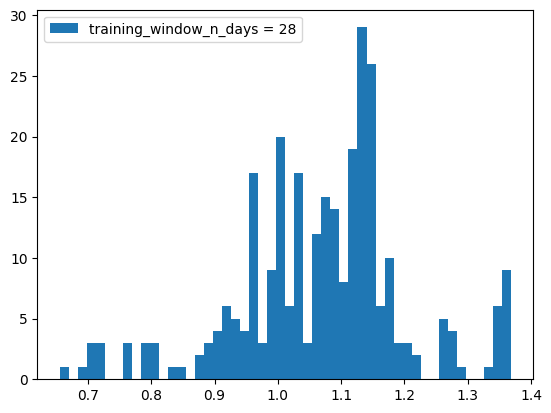

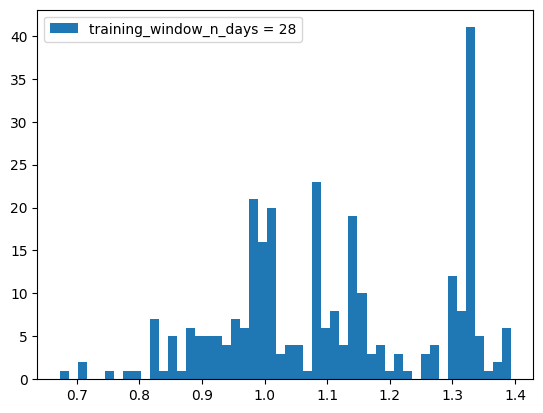

In [ ]:
for i, e in enumerate(eval):
    mse, change, size, region, diff = zip(
        *[
            (
                r["eval_mse"],
                r["change"],
                r["protest"]["size"] if "size" in r["protest"] else 1,
                r["protest_region"],
                r["diff"].mean(),
            )
            for r in e["metrics"]
        ]
    )
    plt.hist(change, bins=50)
    plt.legend(
        [
            "training_window_n_days = {}".format(e["training_window_n_days"])
            for e in eval
        ]
    )
    plt.show()

In [6]:
eval = evaluate(data=random_events, method=predict_with_lasso)

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

(0.3022263141687633, 0.5059459044917508)

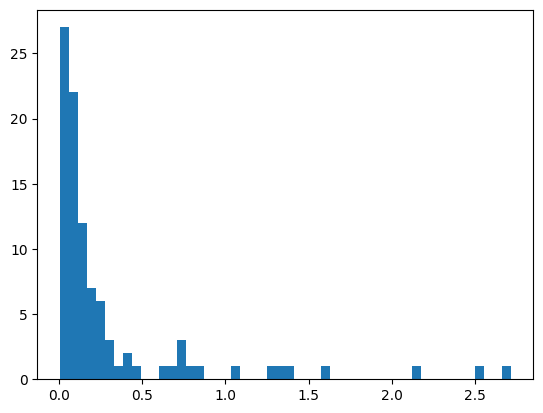

In [15]:
mse = [m["mse"] for m in eval[0]["metrics"]]
plt.hist(mse, bins=50)
np.mean(mse), np.std(mse)

In [7]:
plot(eval)

NameError: name 'plot' is not defined

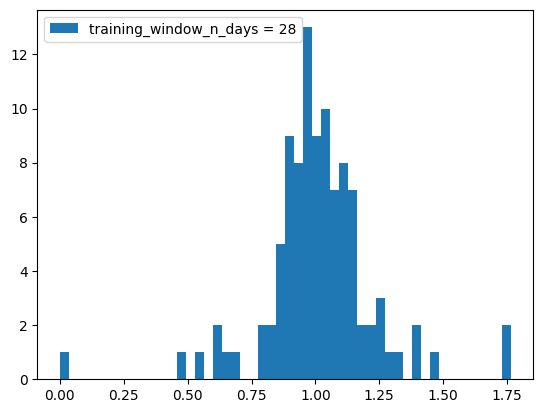

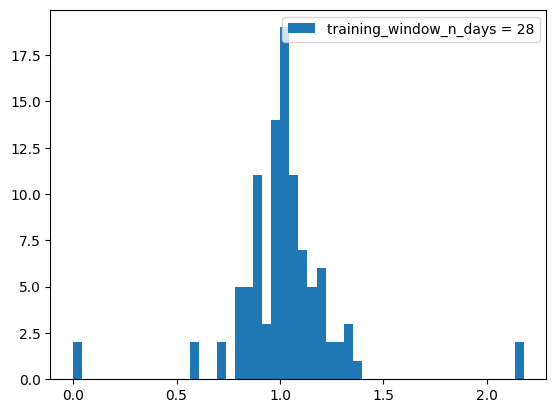

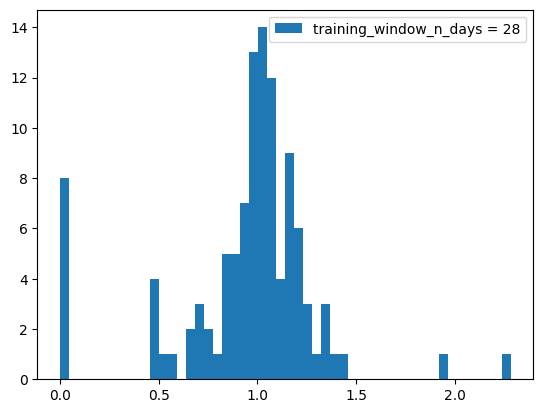

In [137]:
for i, e in enumerate(eval):
    mse, change, size, region, diff = zip(
        *[
            (
                r["eval_mse"],
                r["change"],
                r["protest"]["size"] if "size" in r["protest"] else 1,
                r["protest_region"],
                r["diff"].mean(),
            )
            for r in e["metrics"]
        ]
    )
    plt.hist(change, bins=50)
    plt.legend(
        [
            "training_window_n_days = {}".format(e["training_window_n_days"])
            for e in eval
        ]
    )
    plt.show()

In [ ]:
# eval = evaluate(data=random_events, method=predict_with_boosting)
# plot(eval)